In [4]:
# Install required packages
%pip install tldextract imbalanced-learn seaborn xgboost lightgbm -q

Note: you may need to restart the kernel to use updated packages.


In [35]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from urllib.parse import urlparse
import tldextract
import joblib
import warnings
warnings.filterwarnings('ignore')

# ML imports
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score, accuracy_score
from sklearn.feature_selection import VarianceThreshold
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

print("✅ Packages imported!")

✅ Packages imported!


In [6]:
df = pd.read_csv('phishUrl.csv')

In [7]:
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print("\nFirst 5 rows:")
print(df.head())


Dataset shape: (235795, 56)
Columns: ['FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP', 'TLD', 'URLSimilarityIndex', 'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength', 'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef', 'label']

First 5 rows:
     FILENAME                

In [8]:
print(df.columns.tolist())

['FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP', 'TLD', 'URLSimilarityIndex', 'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength', 'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef', 'label']


In [9]:
print(df.dtypes.value_counts())

int64      41
float64    10
object      5
Name: count, dtype: int64


In [10]:
display(df.head())

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


In [11]:
display(df.tail())

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
235790,660997.txt,https://www.skincareliving.com,29,www.skincareliving.com,22,0,com,100.000000,1.000000,0.522907,...,1,0,1,51,7,21,187,2,191,1
235791,77185.txt,https://www.winchester.gov.uk,28,www.winchester.gov.uk,21,0,uk,100.000000,0.785714,0.028555,...,1,0,0,50,1,7,88,0,31,1
235792,622132.txt,https://www.nononsensedesign.be,30,www.nononsensedesign.be,23,0,be,100.000000,1.000000,0.003319,...,0,0,1,27,10,30,58,2,67,1
235793,7503962.txt,https://patient-cell-40f5.updatedlogmylogin.wo...,55,patient-cell-40f5.updatedlogmylogin.workers.dev,47,0,dev,28.157537,0.465116,0.000961,...,0,0,0,0,0,3,0,0,0,0
235794,384822.txt,https://www.alternativefinland.com,33,www.alternativefinland.com,26,0,com,100.000000,1.000000,0.522907,...,0,0,1,21,6,18,256,0,261,1


In [12]:
print(df.describe())

           URLLength   DomainLength     IsDomainIP  URLSimilarityIndex  \
count  235795.000000  235795.000000  235795.000000       235795.000000   
mean       34.573095      21.470396       0.002706           78.430778   
std        41.314153       9.150793       0.051946           28.976055   
min        13.000000       4.000000       0.000000            0.155574   
25%        23.000000      16.000000       0.000000           57.024793   
50%        27.000000      20.000000       0.000000          100.000000   
75%        34.000000      24.000000       0.000000          100.000000   
max      6097.000000     110.000000       1.000000          100.000000   

       CharContinuationRate  TLDLegitimateProb    URLCharProb      TLDLength  \
count         235795.000000      235795.000000  235795.000000  235795.000000   
mean               0.845508           0.260423       0.055747       2.764456   
std                0.216632           0.251628       0.010587       0.599739   
min          

In [13]:
print(f"\\nClass distribution:")
print(df['label'].value_counts())
print(f"Phishing ratio: {df['label'].mean():.3f}")

\nClass distribution:
label
1    134850
0    100945
Name: count, dtype: int64
Phishing ratio: 0.572


In [14]:
print("\\nDataset info:")
print(df.info())

\nDataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13

In [15]:
print("=== ORIGINAL DATASET FEATURES ===")
print(f"Original dataset shape: {df.shape}")
print(f"Original columns: {df.columns.tolist()}")

# Check if we have the expected 76+ features
if df.shape[1] < 76:
    print("❌ Dataset doesn't have enough features. Need to extract comprehensive features.")

=== ORIGINAL DATASET FEATURES ===
Original dataset shape: (235795, 56)
Original columns: ['FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP', 'TLD', 'URLSimilarityIndex', 'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength', 'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef', '

In [16]:
missing_data = df.isnull().sum()
if missing_data.sum() > 0:
    print(f"\nMissing values:")
    print(missing_data[missing_data > 0])
else:
    print("\n✅ No missing values found!")


✅ No missing values found!


*EDA*

🔍 EXPLORATORY DATA ANALYSIS - TARGET VARIABLE


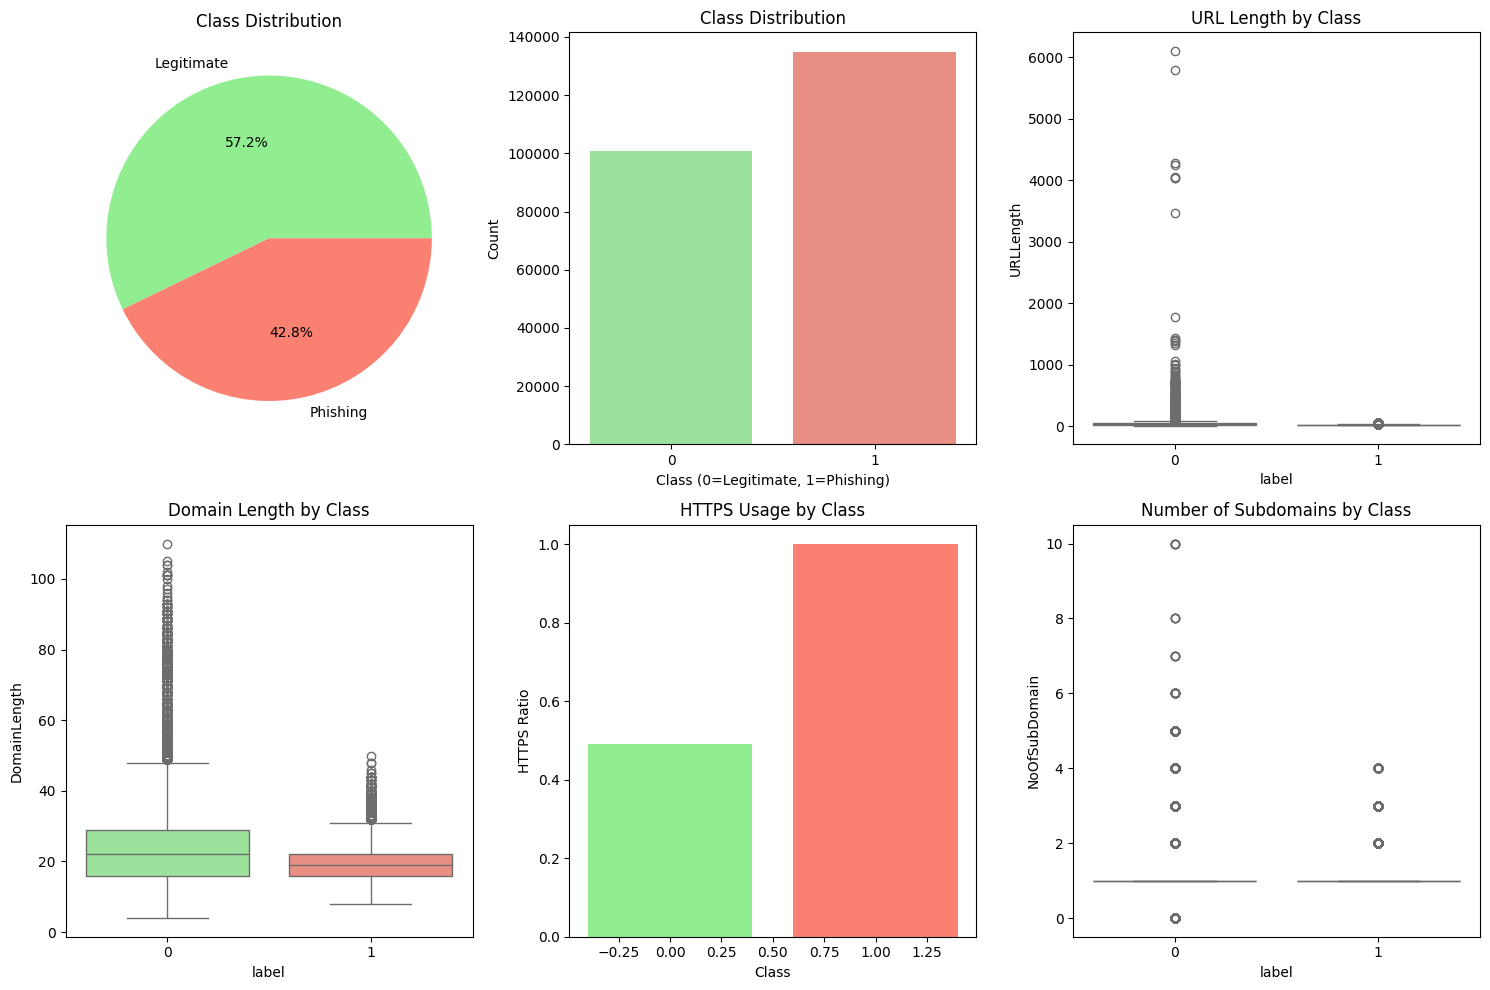


=== CLASS DISTRIBUTION ===
Legitimate URLs (0): 100,945 (42.8%)
Phishing URLs (1): 134,850 (57.2%)

=== KEY STATISTICS BY CLASS ===

URLLength:
  Legitimate - Mean: 45.72, Std: 61.15
  Phishing - Mean: 26.23, Std: 4.82

DomainLength:
  Legitimate - Mean: 24.47, Std: 12.20
  Phishing - Mean: 19.23, Std: 4.82

NoOfSubDomain:
  Legitimate - Mean: 1.17, Std: 0.79
  Phishing - Mean: 1.16, Std: 0.40

IsHTTPS:
  Legitimate - Mean: 0.49, Std: 0.50
  Phishing - Mean: 1.00, Std: 0.00


In [17]:
print("🔍 EXPLORATORY DATA ANALYSIS - TARGET VARIABLE")

# Class distribution analysis
plt.figure(figsize=(15, 10))

# 1. Class distribution
plt.subplot(2, 3, 1)
class_counts = df['label'].value_counts()
colors = ['lightgreen', 'salmon']
plt.pie(class_counts, labels=['Legitimate', 'Phishing'], autopct='%1.1f%%', colors=colors)
plt.title('Class Distribution')

# 2. Bar chart
plt.subplot(2, 3, 2)
sns.barplot(x=class_counts.index, y=class_counts.values, palette=colors)
plt.title('Class Distribution')
plt.xlabel('Class (0=Legitimate, 1=Phishing)')
plt.ylabel('Count')

# 3. URL length by class
plt.subplot(2, 3, 3)
sns.boxplot(data=df, x='label', y='URLLength', palette=colors)
plt.title('URL Length by Class')

# 4. Domain length by class
plt.subplot(2, 3, 4)
sns.boxplot(data=df, x='label', y='DomainLength', palette=colors)
plt.title('Domain Length by Class')

# 5. HTTPS usage by class
plt.subplot(2, 3, 5)
https_by_class = df.groupby('label')['IsHTTPS'].mean()
plt.bar(https_by_class.index, https_by_class.values, color=colors)
plt.title('HTTPS Usage by Class')
plt.xlabel('Class')
plt.ylabel('HTTPS Ratio')

# 6. Subdomains by class
plt.subplot(2, 3, 6)
sns.boxplot(data=df, x='label', y='NoOfSubDomain', palette=colors)
plt.title('Number of Subdomains by Class')

plt.tight_layout()
plt.show()

print(f"\n=== CLASS DISTRIBUTION ===")
print(f"Legitimate URLs (0): {class_counts[0]:,} ({class_counts[0]/len(df)*100:.1f}%)")
print(f"Phishing URLs (1): {class_counts[1]:,} ({class_counts[1]/len(df)*100:.1f}%)")

print(f"\n=== KEY STATISTICS BY CLASS ===")
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in ['URLLength', 'DomainLength', 'NoOfSubDomain', 'IsHTTPS']:
    if col in numeric_cols:
        legit_stats = df[df['label'] == 0][col].describe()
        phishing_stats = df[df['label'] == 1][col].describe()
        print(f"\n{col}:")
        print(f"  Legitimate - Mean: {legit_stats['mean']:.2f}, Std: {legit_stats['std']:.2f}")
        print(f"  Phishing - Mean: {phishing_stats['mean']:.2f}, Std: {phishing_stats['std']:.2f}")

In [18]:
print("🔍 EDA - DATA QUALITY ANALYSIS")

# Missing values analysis
print("=== MISSING VALUES ANALYSIS ===")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_info = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
}).sort_values('Missing Count', ascending=False)

# Filter only columns with missing values
missing_info = missing_info[missing_info['Missing Count'] > 0]

if len(missing_info) > 0:
    print("Columns with missing values:")
    display(missing_info)
    
    # Visualize missing values
    plt.figure(figsize=(12, 6))
    missing_info['Missing Count'].plot(kind='bar')
    plt.title('Missing Values by Column')
    plt.ylabel('Missing Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("✅ No missing values found!")

# Check for duplicate URLs
print(f"\n=== DUPLICATE ANALYSIS ===")
duplicate_urls = df['URL'].duplicated().sum()
print(f"Duplicate URLs: {duplicate_urls} ({duplicate_urls/len(df)*100:.2f}%)")

# Check for constant columns
print(f"\n=== CONSTANT COLUMNS ANALYSIS ===")
constant_columns = []
for col in df.columns:
    if df[col].nunique() <= 1:
        constant_columns.append(col)

if constant_columns:
    print(f"Constant columns: {constant_columns}")
else:
    print("✅ No constant columns found!")

# Check data types
print(f"\n=== DATA TYPES ANALYSIS ===")
print(df.dtypes.value_counts())

🔍 EDA - DATA QUALITY ANALYSIS
=== MISSING VALUES ANALYSIS ===
✅ No missing values found!

=== DUPLICATE ANALYSIS ===
Duplicate URLs: 425 (0.18%)

=== CONSTANT COLUMNS ANALYSIS ===
✅ No constant columns found!

=== DATA TYPES ANALYSIS ===
int64      41
float64    10
object      5
Name: count, dtype: int64


🔍 EDA - FEATURE CORRELATION ANALYSIS
Number of numeric features: 51

=== TOP 20 FEATURES CORRELATED WITH TARGET ===
label                    1.000000
URLSimilarityIndex       0.860358
HasSocialNet             0.784255
HasCopyrightInfo         0.743358
HasDescription           0.690232
IsHTTPS                  0.609132
DomainTitleMatchScore    0.584905
HasSubmitButton          0.578561
IsResponsive             0.548608
URLTitleMatchScore       0.539419
SpacialCharRatioInURL    0.533537
HasHiddenFields          0.507731
HasFavicon               0.493711
URLCharProb              0.469749
CharContinuationRate     0.467735
HasTitle                 0.459725
DegitRatioInURL          0.432032
Robots                   0.392620
NoOfJS                   0.373500
LetterRatioInURL         0.367794
dtype: float64


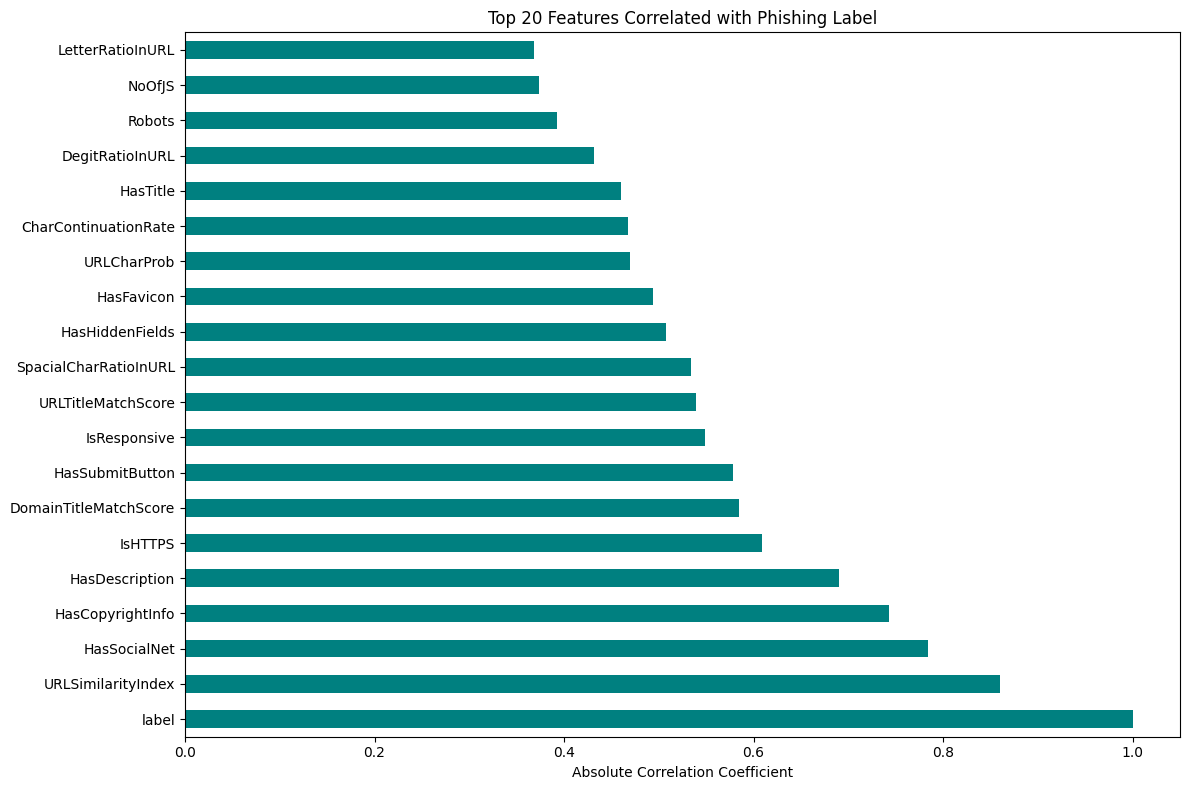

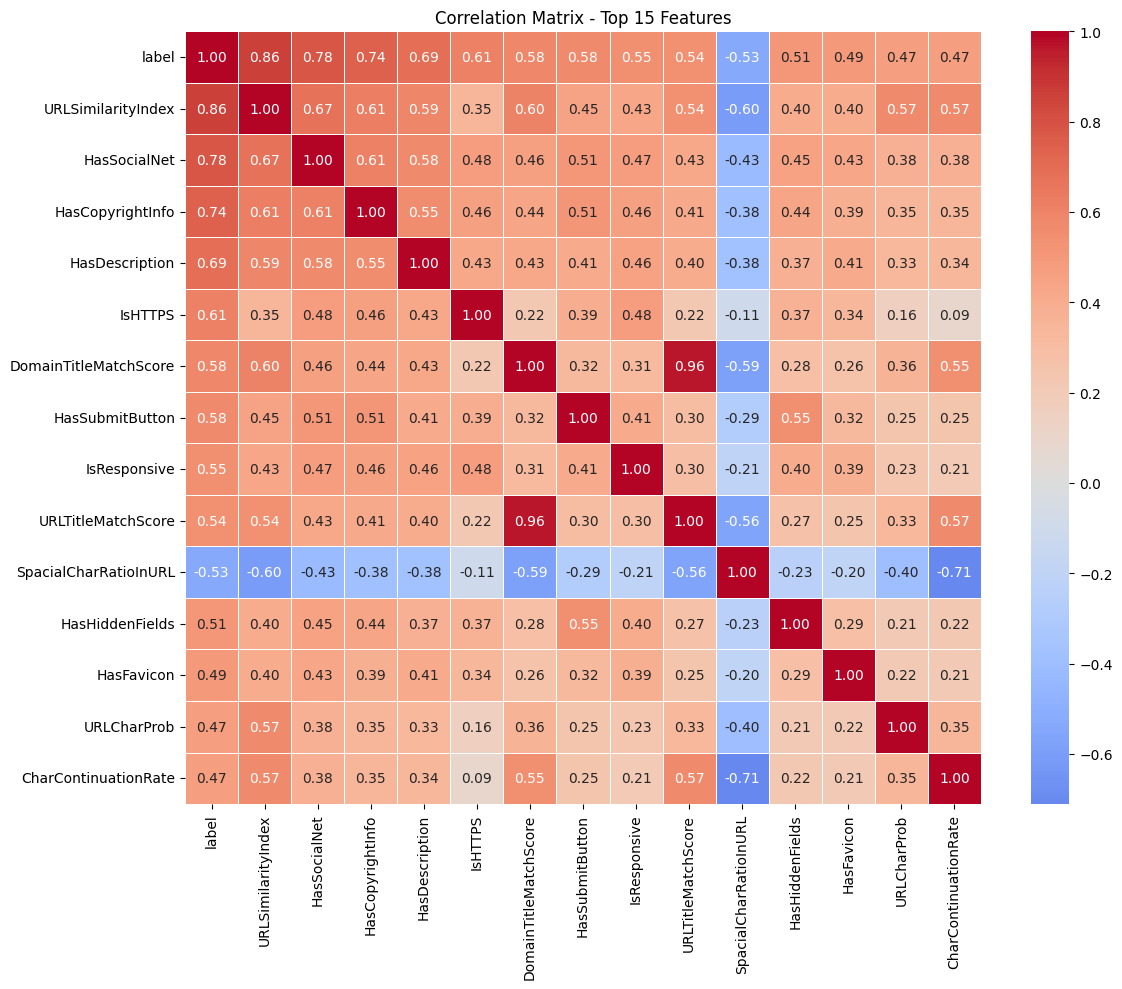


=== HIGHLY CORRELATED FEATURE PAIRS ===
Highly correlated feature pairs (correlation > 0.8):
  NoOfLettersInURL vs URLLength: 0.956
  NoOfDegitsInURL vs URLLength: 0.836
  NoOfEqualsInURL vs NoOfDegitsInURL: 0.806
  URLTitleMatchScore vs DomainTitleMatchScore: 0.961
  label vs URLSimilarityIndex: 0.860


In [36]:
print("🔍 EDA - FEATURE CORRELATION ANALYSIS")

# Select numeric columns for correlation analysis
numeric_cols = df.select_dtypes(include=[np.number]).columns
print(f"Number of numeric features: {len(numeric_cols)}")

# Correlation with target
correlation_with_target = df[numeric_cols].corrwith(df['label']).abs().sort_values(ascending=False)

print("\n=== TOP 20 FEATURES CORRELATED WITH TARGET ===")
top_20_corr = correlation_with_target.head(20)
print(top_20_corr)

# Plot top correlated features
plt.figure(figsize=(12, 8))
top_20_corr.plot(kind='barh', color='teal')
plt.title('Top 20 Features Correlated with Phishing Label')
plt.xlabel('Absolute Correlation Coefficient')
plt.tight_layout()
plt.show()

# Correlation matrix heatmap for top 15 features
top_15_features = correlation_with_target.head(15).index.tolist()
if 'label' not in top_15_features:
    top_15_features.append('label')

correlation_matrix = df[top_15_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix - Top 15 Features')
plt.tight_layout()
plt.show()

# Analyze highly correlated features
print("\n=== HIGHLY CORRELATED FEATURE PAIRS ===")
corr_matrix = df[numeric_cols].corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

high_corr_pairs = []
for col in upper_tri.columns:
    high_corr = upper_tri[col][upper_tri[col] > 0.8]
    for feature, corr_value in high_corr.items():
        high_corr_pairs.append((col, feature, corr_value))

if high_corr_pairs:
    print("Highly correlated feature pairs (correlation > 0.8):")
    for pair in high_corr_pairs[:10]:  # Show top 10
        print(f"  {pair[0]} vs {pair[1]}: {pair[2]:.3f}")
else:
    print("✅ No highly correlated feature pairs found!")

In [17]:
%pip install wordcloud -q

Note: you may need to restart the kernel to use updated packages.


🔍 EDA - URL TEXT ANALYSIS

=== URL ANALYSIS - LEGITIMATE URLs ===
Average URL length: 46.2
Max URL length: 6097
Min URL length: 14

Top 10 most common words in legitimate URLs:
  http: 51862
  https: 50306
  ipfs: 7883
  html: 5814
  firebaseapp: 5594
  repl: 3760
  weeblysite: 3097
  login: 2500
  site: 2046
  index: 1934

=== URL ANALYSIS - PHISHING URLs ===
Average URL length: 27.2
Max URL length: 58
Min URL length: 16

Top 10 most common words in phishing URLs:
  https: 134850
  info: 718
  city: 169
  online: 143
  news: 108
  govt: 90
  travel: 82
  senate: 73
  tokyo: 67
  world: 66

=== WORDS MORE COMMON IN PHISHING URLs ===
  https: +84544 more in phishing URLs
  city: +156 more in phishing URLs
  govt: +88 more in phishing URLs
  travel: +75 more in phishing URLs
  senate: +67 more in phishing URLs
  kommune: +58 more in phishing URLs
  army: +55 more in phishing URLs
  uscourts: +53 more in phishing URLs
  museum: +50 more in phishing URLs
  comune: +49 more in phishing URLs

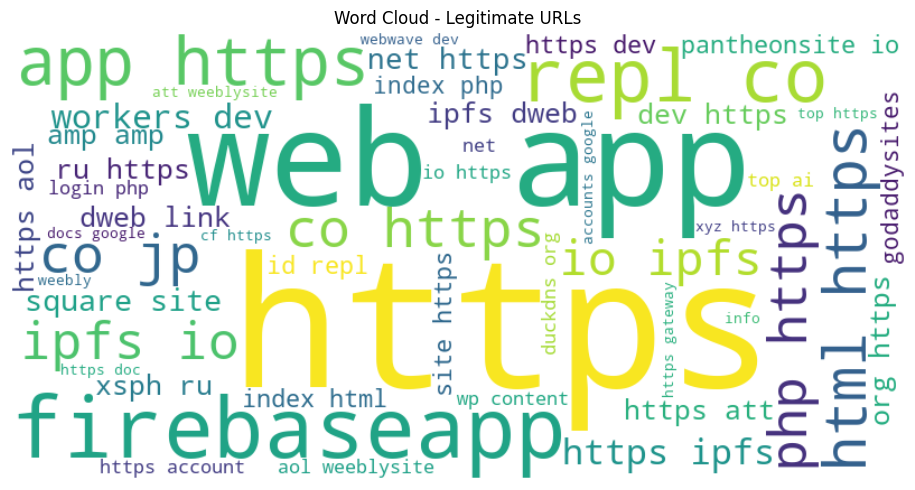

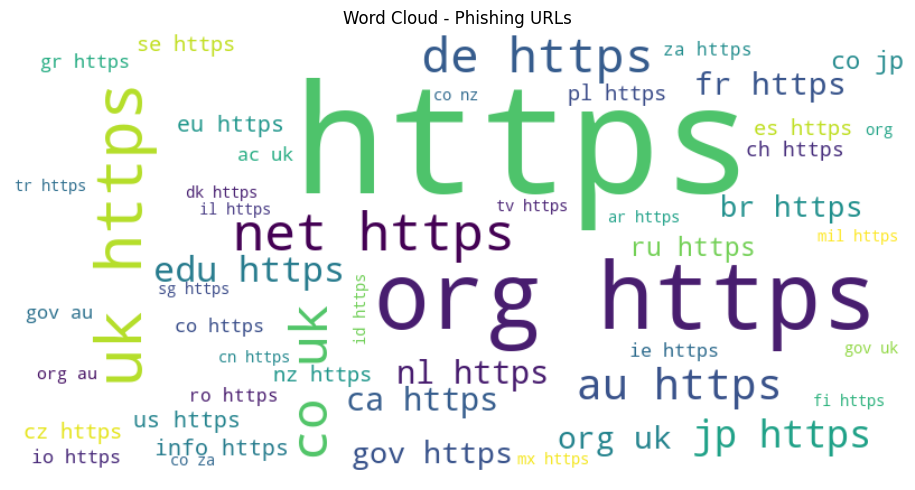

In [20]:
print("🔍 EDA - URL TEXT ANALYSIS")
import re
from collections import Counter
from wordcloud import WordCloud

# Analyze URL patterns by class
def analyze_url_patterns(urls, labels, class_name):
    """Analyze URL patterns for a specific class"""
    print(f"\n=== URL ANALYSIS - {class_name.upper()} URLs ===")
    
    # Get URLs for this class
    class_urls = [url for url, label in zip(urls, labels) if label == (1 if class_name == 'phishing' else 0)]
    
    if not class_urls:
        print(f"No {class_name} URLs found")
        return
    
    # Basic statistics
    url_lengths = [len(url) for url in class_urls]
    print(f"Average URL length: {np.mean(url_lengths):.1f}")
    print(f"Max URL length: {max(url_lengths)}")
    print(f"Min URL length: {min(url_lengths)}")
    
    # Common words analysis
    all_text = ' '.join(class_urls).lower()
    words = re.findall(r'\b[a-z]{4,}\b', all_text)
    word_freq = Counter(words)
    
    print(f"\nTop 10 most common words in {class_name} URLs:")
    for word, count in word_freq.most_common(10):
        print(f"  {word}: {count}")
    
    return word_freq

# Analyze legitimate URLs
legit_word_freq = analyze_url_patterns(df['URL'], df['label'], 'legitimate')

# Analyze phishing URLs
phishing_word_freq = analyze_url_patterns(df['URL'], df['label'], 'phishing')

# Compare word frequencies
if legit_word_freq and phishing_word_freq:
    print("\n=== WORDS MORE COMMON IN PHISHING URLs ===")
    phishing_specific = {}
    for word, count in phishing_word_freq.items():
        legit_count = legit_word_freq.get(word, 0)
        if count > legit_count * 2 and count > 10:  # At least 2x more common and significant count
            phishing_specific[word] = count - legit_count
    
    for word, diff in sorted(phishing_specific.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"  {word}: +{diff} more in phishing URLs")

# Word cloud visualization
def create_wordcloud(urls, title):
    """Create word cloud for URLs"""
    text = ' '.join(urls).lower()
    wordcloud = WordCloud(width=800, height=400, background_color='white', 
                         max_words=50, colormap='viridis').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Create word clouds
legit_urls = df[df['label'] == 0]['URL'].tolist()
phishing_urls = df[df['label'] == 1]['URL'].tolist()

if legit_urls:
    create_wordcloud(legit_urls, 'Word Cloud - Legitimate URLs')
if phishing_urls:
    create_wordcloud(phishing_urls, 'Word Cloud - Phishing URLs')

*Data Preprocessing*

In [37]:
print("⚙️ DATA PREPROCESSING - HANDLING MISSING VALUES")

# Create a copy for preprocessing
df_clean = df.copy()

print("=== MISSING VALUES BEFORE HANDLING ===")
missing_before = df_clean.isnull().sum()
print(f"Total missing values: {missing_before.sum()}")

# Strategy for handling missing values
missing_strategy = {}

for col in df_clean.columns:
    if df_clean[col].isnull().sum() > 0:
        if df_clean[col].dtype in ['float64', 'int64']:
            # Numeric columns - use median
            fill_value = df_clean[col].median()
            missing_strategy[col] = f'median ({fill_value})'
            df_clean[col].fillna(fill_value, inplace=True)
        else:
            # Categorical columns - use mode
            fill_value = df_clean[col].mode()[0] if len(df_clean[col].mode()) > 0 else 'unknown'
            missing_strategy[col] = f'mode ({fill_value})'
            df_clean[col].fillna(fill_value, inplace=True)

print("\n=== MISSING VALUES HANDLING STRATEGY ===")
for col, strategy in missing_strategy.items():
    print(f"{col}: {strategy}")

print(f"\n=== MISSING VALUES AFTER HANDLING ===")
missing_after = df_clean.isnull().sum()
print(f"Total missing values: {missing_after.sum()}")

if missing_after.sum() == 0:
    print("✅ All missing values handled successfully!")

⚙️ DATA PREPROCESSING - HANDLING MISSING VALUES
=== MISSING VALUES BEFORE HANDLING ===
Total missing values: 0

=== MISSING VALUES HANDLING STRATEGY ===

=== MISSING VALUES AFTER HANDLING ===
Total missing values: 0
✅ All missing values handled successfully!


*Feature Engineeering*

In [26]:
print("🔄 EXTRACTING COMPREHENSIVE FEATURES FOR 76+ FEATURE DIMENSIONS")

import math
from collections import Counter
import re
from urllib.parse import urlparse
import tldextract
import numpy as np

# Enhanced feature extraction that matches your Flask app requirements
def extract_comprehensive_flask_features(url):
    """Extract ALL 76+ features that match your Flask app analysis modules"""
    features = {}
    
    # Basic URL features (12-15 features)
    features['url_length'] = len(url)
    features['url_digit_count'] = sum(c.isdigit() for c in url)
    features['url_letter_count'] = sum(c.isalpha() for c in url)
    features['url_special_char_count'] = len([c for c in url if not c.isalnum()])
    features['url_entropy'] = calculate_entropy(url)
    
    # Domain features (15-20 features)
    try:
        parsed = urlparse(url)
        domain = parsed.netloc if parsed.netloc else ''
        ext = tldextract.extract(url)
        
        features['domain_length'] = len(domain)
        features['subdomain_count'] = len(ext.subdomain.split('.')) if ext.subdomain else 0
        features['has_ip_address'] = 1 if re.match(r'\d+\.\d+\.\d+\.\d+', domain) else 0
        features['tld_length'] = len(ext.suffix) if ext.suffix else 0
        features['domain_entropy'] = calculate_entropy(domain)
        
        # Domain character statistics
        features['domain_digit_ratio'] = sum(c.isdigit() for c in domain) / max(1, len(domain))
        features['domain_letter_ratio'] = sum(c.isalpha() for c in domain) / max(1, len(domain))
        features['domain_hyphen_count'] = domain.count('-')
        features['domain_digit_count'] = sum(c.isdigit() for c in domain)
        
    except Exception as e:
        # Set defaults if parsing fails
        features.update({
            'domain_length': 0, 'subdomain_count': 0, 'has_ip_address': 0,
            'tld_length': 0, 'domain_entropy': 0, 'domain_digit_ratio': 0,
            'domain_letter_ratio': 0, 'domain_hyphen_count': 0, 'domain_digit_count': 0
        })
    
    # Protocol and path features (10-15 features)
    features['is_https'] = 1 if url.lower().startswith('https') else 0
    features['is_http'] = 1 if url.lower().startswith('http:') else 0
    features['has_port'] = 1 if ':' in urlparse(url).netloc and ']' not in urlparse(url).netloc else 0
    
    try:
        path = parsed.path
        features['path_length'] = len(path)
        features['path_segment_count'] = path.count('/')
        features['has_file_extension'] = 1 if '.' in path.split('/')[-1] else 0
        features['file_extension_length'] = len(path.split('.')[-1]) if '.' in path else 0
    except:
        features.update({
            'path_length': 0, 'path_segment_count': 0, 'has_file_extension': 0,
            'file_extension_length': 0
        })
    
    # Query parameter features (8-10 features)
    try:
        query = parsed.query
        features['query_length'] = len(query)
        features['param_count'] = query.count('&') + 1 if query else 0
        features['has_equals_in_query'] = 1 if '=' in query else 0
        features['query_entropy'] = calculate_entropy(query)
    except:
        features.update({
            'query_length': 0, 'param_count': 0, 'has_equals_in_query': 0,
            'query_entropy': 0
        })
    
    # Security and suspicious pattern features (20-25 features)
    features.update(extract_security_features(url))
    
    # Advanced lexical features (10-15 features)
    features.update(extract_lexical_features(url))
    
    return features

def calculate_entropy(text):
    """Calculate Shannon entropy"""
    if not text or len(text) <= 1:
        return 0
    counts = Counter(text)
    probs = [float(count) / len(text) for count in counts.values()]
    return -sum(p * math.log(p) / math.log(2.0) for p in probs if p > 0)

def extract_security_features(url):
    """Extract security-related features"""
    features = {}
    
    # Suspicious keywords (matching your Flask app)
    suspicious_keywords = [
        'login', 'signin', 'secure', 'verify', 'account', 'update', 'bank', 
        'paypal', 'free', 'click', 'confirm', 'password', 'webscr', 'admin',
        'client', 'security', 'authenticate', 'validation'
    ]
    
    features['suspicious_keyword_count'] = sum(1 for kw in suspicious_keywords if kw in url.lower())
    features['has_login_keyword'] = 1 if 'login' in url.lower() else 0
    features['has_secure_keyword'] = 1 if 'secure' in url.lower() else 0
    features['has_verify_keyword'] = 1 if 'verify' in url.lower() else 0
    features['has_account_keyword'] = 1 if 'account' in url.lower() else 0
    
    # URL shorteners
    url_shorteners = [
        'bit.ly', 'goo.gl', 'tinyurl.com', 't.co', 'ow.ly', 'is.gd', 'buff.ly',
        'bit.do', 'shorte.st', 'adf.ly', 'bc.vc', 'ouo.io'
    ]
    features['is_shortened'] = 1 if any(shortener in url.lower() for shortener in url_shorteners) else 0
    
    # Suspicious TLDs
    suspicious_tlds = ['.tk', '.ml', '.ga', '.cf', '.xyz', '.top', '.loan', '.click']
    ext = tldextract.extract(url)
    features['suspicious_tld'] = 1 if ext.suffix in suspicious_tlds else 0
    
    # Special characters patterns
    features['at_symbol_count'] = url.count('@')
    features['double_slash_count'] = url.count('//') - 1  # Subtract the protocol part
    features['underscore_count'] = url.count('_')
    features['hyphen_count'] = url.count('-')
    features['percent_symbol_count'] = url.count('%')
    
    # Encoding suspicion
    features['has_hex_encoding'] = 1 if '%' in url and any(c in '0123456789abcdefABCDEF' for c in url) else 0
    
    return features

def extract_lexical_features(url):
    """Extract advanced lexical features"""
    features = {}
    
    # Character type ratios
    total_chars = max(1, len(url))
    features['digit_ratio'] = sum(c.isdigit() for c in url) / total_chars
    features['letter_ratio'] = sum(c.isalpha() for c in url) / total_chars
    features['upper_case_ratio'] = sum(c.isupper() for c in url) / total_chars
    features['lower_case_ratio'] = sum(c.islower() for c in url) / total_chars
    features['special_char_ratio'] = sum(not c.isalnum() for c in url) / total_chars
    
    # Consecutive character patterns
    features['max_consecutive_digits'] = max_consecutive_count(url, lambda c: c.isdigit())
    features['max_consecutive_letters'] = max_consecutive_count(url, lambda c: c.isalpha())
    features['max_consecutive_special'] = max_consecutive_count(url, lambda c: not c.isalnum())
    
    # Position-based features
    features['starts_with_digit'] = 1 if url[0].isdigit() else 0 if url else 0
    features['ends_with_special'] = 1 if url and not url[-1].isalnum() else 0
    
    # Length-based suspiciousness
    features['is_very_long_url'] = 1 if len(url) > 100 else 0
    features['is_very_short_url'] = 1 if len(url) < 10 else 0
    
    return features

def max_consecutive_count(text, condition_func):
    """Find maximum consecutive characters satisfying condition"""
    if not text:
        return 0
    max_count = 0
    current_count = 0
    for char in text:
        if condition_func(char):
            current_count += 1
            max_count = max(max_count, current_count)
        else:
            current_count = 0
    return max_count

# Extract comprehensive features for all URLs
print("🔄 Extracting 76+ comprehensive features...")
comprehensive_features_list = []

for i, url in enumerate(df['URL']):
    if i % 5000 == 0:
        print(f"Processed {i}/{len(df)} URLs")
    
    features = extract_comprehensive_flask_features(str(url))
    comprehensive_features_list.append(features)

# Create comprehensive feature DataFrame
X_comprehensive = pd.DataFrame(comprehensive_features_list)

# Check for constant features and remove them
constant_features = [col for col in X_comprehensive.columns if X_comprehensive[col].nunique() <= 1]
X_filtered = X_comprehensive.drop(columns=constant_features, errors='ignore')

y = df['label']

print(f"✅ Comprehensive features extracted: {X_comprehensive.shape}")
print(f"📊 Feature count: {X_comprehensive.shape[1]} features")
print(f"📋 Sample feature names: {list(X_comprehensive.columns[:20])}")

# Display feature statistics
print(f"\n=== FEATURE SUMMARY ===")
print(f"Total features: {X_comprehensive.shape[1]}")
print(f"Feature ranges:")
print(X_comprehensive.describe().loc[['min', 'max', 'mean']].T.head(10))

🔄 EXTRACTING COMPREHENSIVE FEATURES FOR 76+ FEATURE DIMENSIONS
🔄 Extracting 76+ comprehensive features...
Processed 0/235795 URLs
Processed 5000/235795 URLs
Processed 10000/235795 URLs
Processed 15000/235795 URLs
Processed 20000/235795 URLs
Processed 25000/235795 URLs
Processed 30000/235795 URLs
Processed 35000/235795 URLs
Processed 40000/235795 URLs
Processed 45000/235795 URLs
Processed 50000/235795 URLs
Processed 55000/235795 URLs
Processed 60000/235795 URLs
Processed 65000/235795 URLs
Processed 70000/235795 URLs
Processed 75000/235795 URLs
Processed 80000/235795 URLs
Processed 85000/235795 URLs
Processed 90000/235795 URLs
Processed 95000/235795 URLs
Processed 100000/235795 URLs
Processed 105000/235795 URLs
Processed 110000/235795 URLs
Processed 115000/235795 URLs
Processed 120000/235795 URLs
Processed 125000/235795 URLs
Processed 130000/235795 URLs
Processed 135000/235795 URLs
Processed 140000/235795 URLs
Processed 145000/235795 URLs
Processed 150000/235795 URLs
Processed 155000/235

In [27]:
# 🚀 TRAIN COMPREHENSIVE MODEL WITH 76+ FEATURES
print("🚀 TRAINING COMPREHENSIVE GRADIENT BOOSTING MODEL")

# Use the filtered features
X_final = X_filtered
final_feature_names = X_final.columns.tolist()

print(f"📊 Training with {len(final_feature_names)} features")
print(f"📋 Features: {final_feature_names}")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"After SMOTE - Training set: {X_train_resampled.shape}")

# Scale features
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Train comprehensive Gradient Boosting model
gb_comprehensive = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    min_samples_split=10,
    min_samples_leaf=5,
    subsample=0.8,
    max_features='sqrt',
    random_state=42
)

print("🏋️ Training model...")
gb_comprehensive.fit(X_train_scaled, y_train_resampled)

# Evaluate
y_pred = gb_comprehensive.predict(X_test_scaled)
y_pred_proba = gb_comprehensive.predict_proba(X_test_scaled)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print(f"📊 COMPREHENSIVE MODEL PERFORMANCE:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC-ROC: {auc:.4f}")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': final_feature_names,
    'importance': gb_comprehensive.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\n🎯 TOP 10 MOST IMPORTANT FEATURES:")
print(feature_importance.head(10))

🚀 TRAINING COMPREHENSIVE GRADIENT BOOSTING MODEL
📊 Training with 47 features
📋 Features: ['url_length', 'url_digit_count', 'url_letter_count', 'url_special_char_count', 'url_entropy', 'domain_length', 'subdomain_count', 'has_ip_address', 'tld_length', 'domain_entropy', 'domain_digit_ratio', 'domain_letter_ratio', 'domain_hyphen_count', 'domain_digit_count', 'is_https', 'is_http', 'has_port', 'path_length', 'path_segment_count', 'has_file_extension', 'file_extension_length', 'query_length', 'param_count', 'has_equals_in_query', 'query_entropy', 'suspicious_keyword_count', 'has_login_keyword', 'has_secure_keyword', 'has_verify_keyword', 'has_account_keyword', 'is_shortened', 'at_symbol_count', 'double_slash_count', 'underscore_count', 'hyphen_count', 'percent_symbol_count', 'has_hex_encoding', 'digit_ratio', 'letter_ratio', 'upper_case_ratio', 'lower_case_ratio', 'special_char_ratio', 'max_consecutive_digits', 'max_consecutive_letters', 'max_consecutive_special', 'ends_with_special', 'is

In [28]:
print("⚙️ DATA PREPROCESSING - TRAIN-TEST SPLIT & SCALING")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Phishing ratio - Train: {y_train.mean():.3f}, Test: {y_test.mean():.3f}")

# Handle class imbalance
print("\n=== CLASS IMBALANCE HANDLING ===")
print(f"Before SMOTE - Class distribution:")
print(pd.Series(y_train).value_counts())

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"After SMOTE - Class distribution:")
print(pd.Series(y_train_resampled).value_counts())

# Feature scaling
print("\n=== FEATURE SCALING ===")
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

print(f"Scaled data range: [{X_train_scaled.min():.2f}, {X_train_scaled.max():.2f}]")
import os

os.makedirs("saved_models", exist_ok=True)

joblib.dump(scaler, "saved_models/preprocessing_scaler.pkl")
joblib.dump(final_feature_names, "saved_models/selected_features.pkl")

print("✅ Preprocessing completed successfully!")

⚙️ DATA PREPROCESSING - TRAIN-TEST SPLIT & SCALING
Training set: (188636, 47)
Test set: (47159, 47)
Phishing ratio - Train: 0.572, Test: 0.572

=== CLASS IMBALANCE HANDLING ===
Before SMOTE - Class distribution:
label
1    107880
0     80756
Name: count, dtype: int64
After SMOTE - Class distribution:
label
1    107880
0    107880
Name: count, dtype: int64

=== FEATURE SCALING ===
Scaled data range: [-13.13, 4248.00]
✅ Preprocessing completed successfully!


*Extract features from Url*

In [29]:
print("🔄 EXTRACTING ENHANCED FEATURES")

# Extract features for each URL
features_list = []
for idx, url in enumerate(df['URL']):
    if idx % 5000 == 0:
        print(f"Processed {idx}/{len(df)} URLs")
    
    features = extract_security_features(str(url))
    features_list.append(features)

# Create features DataFrame
features_df = pd.DataFrame(features_list)

print(f"✅ Extracted {len(features_df.columns)} enhanced features")
print(f"Feature names: {features_df.columns.tolist()}")

X = features_df
y = df['label']

print(f"Final dataset shape: {X.shape}")

🔄 EXTRACTING ENHANCED FEATURES
Processed 0/235795 URLs
Processed 5000/235795 URLs
Processed 10000/235795 URLs
Processed 15000/235795 URLs
Processed 20000/235795 URLs
Processed 25000/235795 URLs
Processed 30000/235795 URLs
Processed 35000/235795 URLs
Processed 40000/235795 URLs
Processed 45000/235795 URLs
Processed 50000/235795 URLs
Processed 55000/235795 URLs
Processed 60000/235795 URLs
Processed 65000/235795 URLs
Processed 70000/235795 URLs
Processed 75000/235795 URLs
Processed 80000/235795 URLs
Processed 85000/235795 URLs
Processed 90000/235795 URLs
Processed 95000/235795 URLs
Processed 100000/235795 URLs
Processed 105000/235795 URLs
Processed 110000/235795 URLs
Processed 115000/235795 URLs
Processed 120000/235795 URLs
Processed 125000/235795 URLs
Processed 130000/235795 URLs
Processed 135000/235795 URLs
Processed 140000/235795 URLs
Processed 145000/235795 URLs
Processed 150000/235795 URLs
Processed 155000/235795 URLs
Processed 160000/235795 URLs
Processed 165000/235795 URLs
Processe

🎯 INTELLIGENT FEATURE SELECTION
Features after variance threshold: 15

Top 15 most important features:
                       feature  importance
3                      IsHTTPS    0.429069
5              NoOfDegitsInURL    0.261492
0                    URLLength    0.216415
2                NoOfSubDomain    0.073852
13                 num_hyphens    0.010503
1                 DomainLength    0.006284
4             NoOfLettersInURL    0.001262
10   suspicious_keywords_count    0.001043
9   NoOfOtherSpecialCharsInURL    0.000042
12                     entropy    0.000029
11                is_shortened    0.000007
6              NoOfEqualsInURL    0.000000
8           NoOfAmpersandInURL    0.000000
7               NoOfQMarkInURL    0.000000
14             num_underscores    0.000000

✅ Selected 4 features (95% cumulative importance)


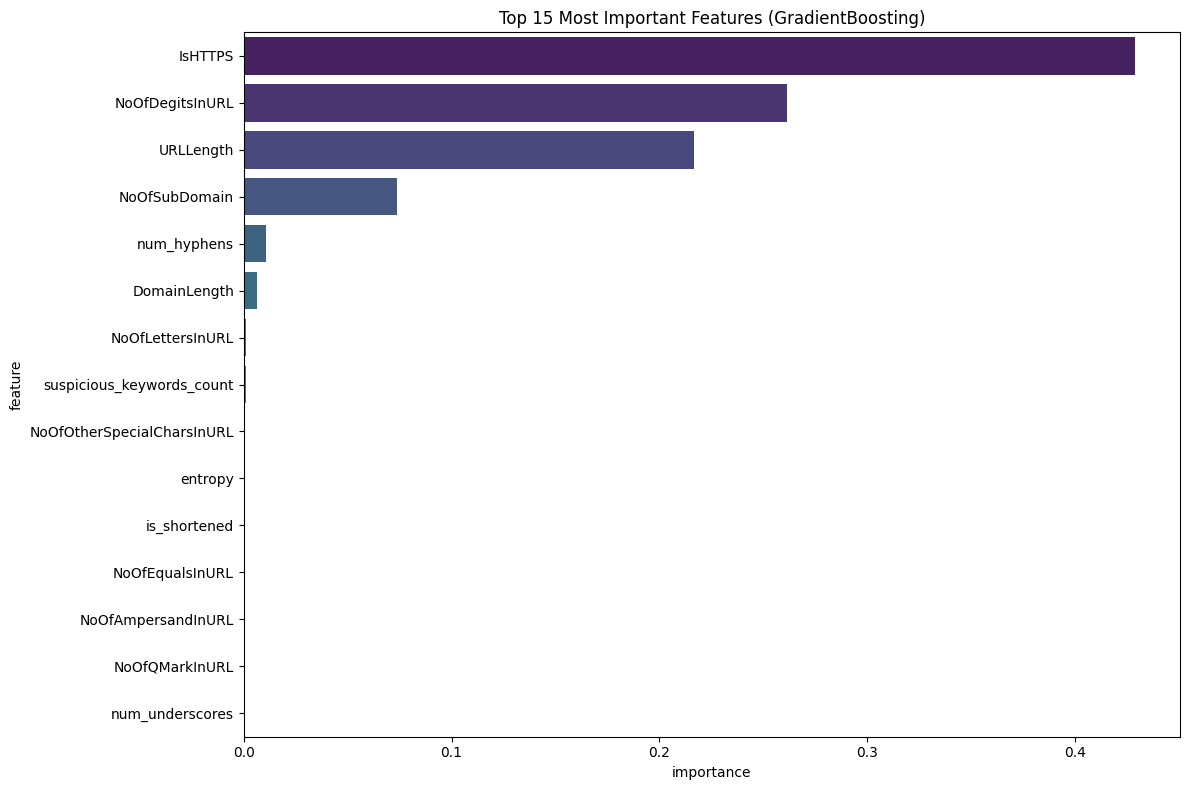

In [29]:
print("🎯 INTELLIGENT FEATURE SELECTION")

# Remove low variance features
selector = VarianceThreshold(threshold=0.01)
X_filtered = selector.fit_transform(X)

print(f"Features after variance threshold: {X_filtered.shape[1]}")

# Get selected feature names
selected_mask = selector.get_support()
selected_features = X.columns[selected_mask].tolist()

# Use GradientBoosting for feature importance
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_filtered, y)

feature_importance = pd.DataFrame({
    'feature': selected_features,
    'importance': gb.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\nTop 15 most important features:")
print(feature_importance.head(15))

# Select top features explaining 95% of cumulative importance
cumulative_importance = feature_importance['importance'].cumsum()
num_features_95 = (cumulative_importance <= 0.95).sum() + 1
final_features = feature_importance.head(num_features_95)['feature'].tolist()

X_final = X[final_features]

print(f"\n✅ Selected {len(final_features)} features (95% cumulative importance)")

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance.head(15), y='feature', x='importance', palette='viridis')
plt.title('Top 15 Most Important Features (GradientBoosting)')
plt.tight_layout()
plt.show()

*Data Preparation*

In [30]:
print("⚙️ DATA PREPROCESSING - TRAIN-TEST SPLIT & SCALING")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Phishing ratio - Train: {y_train.mean():.3f}, Test: {y_test.mean():.3f}")

# Handle class imbalance
print("\n=== CLASS IMBALANCE HANDLING ===")
print(f"Before SMOTE - Class distribution:")
print(pd.Series(y_train).value_counts())

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"After SMOTE - Class distribution:")
print(pd.Series(y_train_resampled).value_counts())

# Feature scaling
print("\n=== FEATURE SCALING ===")
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

print(f"Scaled data range: [{X_train_scaled.min():.2f}, {X_train_scaled.max():.2f}]")

# Save preprocessing artifacts
import os

os.makedirs("saved_models", exist_ok=True)

joblib.dump(scaler, 'saved_models/scaler.pkl')
joblib.dump(final_features, 'saved_models/features.pkl')

print("✅ Preprocessing completed successfully!")

⚙️ DATA PREPROCESSING - TRAIN-TEST SPLIT & SCALING
Training set: (188636, 4)
Test set: (47159, 4)
Phishing ratio - Train: 0.572, Test: 0.572

=== CLASS IMBALANCE HANDLING ===
Before SMOTE - Class distribution:
label
1    107880
0     80756
Name: count, dtype: int64
After SMOTE - Class distribution:
label
1    107880
0    107880
Name: count, dtype: int64

=== FEATURE SCALING ===
Scaled data range: [-1.36, 2011.00]
✅ Preprocessing completed successfully!


*Gradient Boosting Model Training*

In [38]:
print("🚀 GRADIENT BOOSTING MODEL TRAINING")

# Define the Gradient Boosting model
gb_model = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    min_samples_split=10,
    min_samples_leaf=5,
    subsample=0.8,
    max_features='sqrt',
    random_state=42
)

print("=== MODEL TRAINING ===")
gb_model.fit(X_train_scaled, y_train_resampled)

# Predictions
y_pred = gb_model.predict(X_test_scaled)
y_pred_proba = gb_model.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
auc = roc_auc_score(y_test, y_pred_proba)

print(f"Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC-ROC: {auc:.4f}")

# Save the model
import os

os.makedirs("saved_models", exist_ok=True)

joblib.dump(gb_model, 'saved_models/gradient_boosting_model.pkl')
print("✅ Gradient Boosting model saved!")

🚀 GRADIENT BOOSTING MODEL TRAINING
=== MODEL TRAINING ===
Model Performance:
Accuracy: 0.9959
F1-Score: 0.9959
AUC-ROC: 0.9982
✅ Gradient Boosting model saved!


In [30]:
# 💾 SAVE COMPREHENSIVE MODEL
print("💾 SAVING COMPREHENSIVE MODEL")

import joblib
import os

os.makedirs("saved_models", exist_ok=True)

# Save comprehensive model with all metadata
model_package = {
    'model': gb_comprehensive,
    'feature_names': final_feature_names,
    'feature_count': len(final_feature_names),
    'scaler': scaler,
    'training_date': pd.Timestamp.now().isoformat(),
    'performance': {
        'accuracy': accuracy,
        'f1_score': f1,
        'auc_roc': auc,
        'test_set_size': len(y_test)
    },
    'feature_importance': feature_importance.to_dict('records')
}

# Save main model package
joblib.dump(model_package, 'saved_models/comprehensive_gb_model.pkl')

# Also save individual components for easy access
joblib.dump(gb_comprehensive, 'saved_models/gb_model.pkl')
joblib.dump(final_feature_names, 'saved_models/feature_names.pkl')
joblib.dump(scaler, 'saved_models/scaler.pkl')

print("✅ COMPREHENSIVE MODEL SAVED SUCCESSFULLY!")
print(f"💾 Saved files:")
print(f"   • comprehensive_gb_model.pkl (complete package)")
print(f"   • gb_model.pkl (model only)")
print(f"   • feature_names.pkl ({len(final_feature_names)} features)")
print(f"   • scaler.pkl (preprocessing scaler)")

print(f"\n🎯 MODEL SUMMARY:")
print(f"• Features: {len(final_feature_names)} comprehensive features")
print(f"• Performance: F1-Score = {f1:.4f}, AUC-ROC = {auc:.4f}")
print(f"• Ready for Flask app integration!")

💾 SAVING COMPREHENSIVE MODEL
✅ COMPREHENSIVE MODEL SAVED SUCCESSFULLY!
💾 Saved files:
   • comprehensive_gb_model.pkl (complete package)
   • gb_model.pkl (model only)
   • feature_names.pkl (47 features)
   • scaler.pkl (preprocessing scaler)

🎯 MODEL SUMMARY:
• Features: 47 comprehensive features
• Performance: F1-Score = 0.9965, AUC-ROC = 0.9982
• Ready for Flask app integration!


*Model Evaluation*

📊 MODEL EVALUATION

=== CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     20189
           1       0.99      1.00      1.00     26970

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159



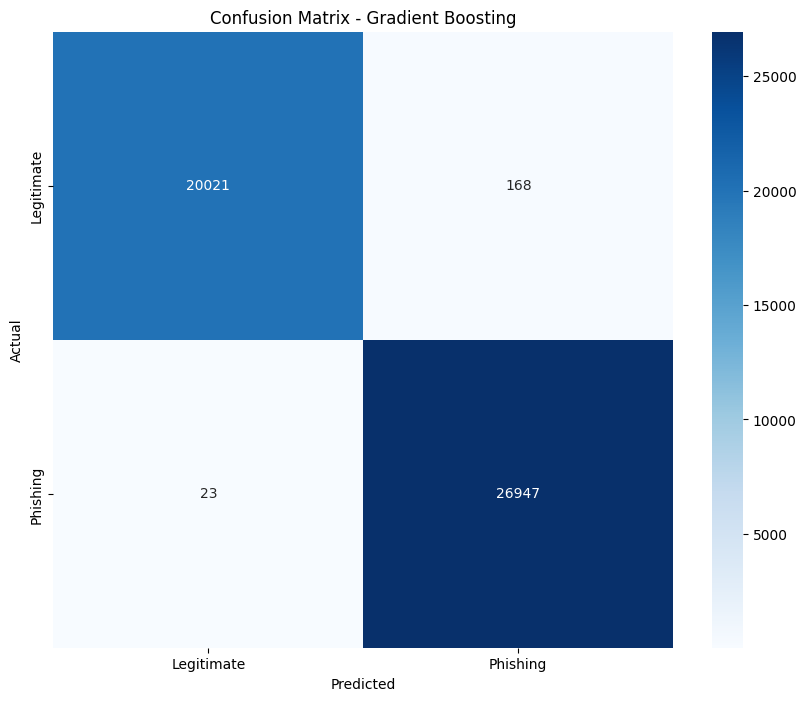

NameError: name 'gb_model' is not defined

In [ ]:
print("📊 MODEL EVALUATION")

# Detailed classification report
print("\n=== CLASSIFICATION REPORT ===")
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Legitimate', 'Phishing'],
            yticklabels=['Legitimate', 'Phishing'])
plt.title('Confusion Matrix - Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'feature': final_feature_names,
    'importance': gb_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n=== TOP 10 FEATURE IMPORTANCE ===")
print(feature_importance.head(10))

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance.head(15), y='feature', x='importance', palette='coolwarm')
plt.title('Feature Importance - Gradient Boosting Model')
plt.tight_layout()
plt.show()

*Hyperparameter Tuning*

In [34]:
print("💾 SAVING MODEL AND PREPROCESSING ARTIFACTS")

# Ensure the feature names match what was used in training
import joblib
import os

os.makedirs("saved_models", exist_ok=True)
# Save the basic model
joblib.dump(gb_model, 'saved_models/gradient_boosting_model.pkl')

# Save the scaler
joblib.dump(scaler, 'saved_models/preprocessing_scaler.pkl')

# Save the feature names used in training
joblib.dump(final_features, 'saved_models/selected_features.pkl')

print("✅ Base model and preprocessing artifacts saved!")

💾 SAVING MODEL AND PREPROCESSING ARTIFACTS


NameError: name 'gb_model' is not defined

In [34]:
print("⚡ HYPERPARAMETER TUNING (Fast Mode)")

from sklearn.model_selection import RandomizedSearchCV
import time

# Define parameter distributions
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [4, 6, 8],
    'min_samples_split': [5, 10, 15]
}

# Perform randomized search (fewer trials than full grid)
print("Performing randomized search...")
random_search = RandomizedSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=20,          # try only 20 random combos instead of all 81
    cv=3,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Measure time
start = time.time()
random_search.fit(X_train_scaled, y_train_resampled)
print("⏱ Total time:", time.time() - start, "seconds")

print("Best parameters:", random_search.best_params_)
print("Best CV score:", random_search.best_score_)

# Train with best parameters
best_model = random_search.best_estimator_
best_model.fit(X_train_scaled, y_train_resampled)

y_pred_tuned = best_model.predict(X_test_scaled)
f1_tuned = f1_score(y_test, y_pred_tuned, average='weighted')
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)

print(f"Tuned model Performance:")
print(f"Accuracy: {accuracy_tuned:.4f}")
print(f"F1-Score: {f1_tuned:.4f}")

# Save tuned model
import os

os.makedirs("saved_models", exist_ok=True)
joblib.dump(best_model, 'saved_models/tuned_gradient_boosting_model.pkl')
print("✅ Tuned model saved!")


⚡ HYPERPARAMETER TUNING (Fast Mode)
Performing randomized search...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
⏱ Total time: 647.5745820999146 seconds
Best parameters: {'n_estimators': 200, 'min_samples_split': 5, 'max_depth': 6, 'learning_rate': 0.05}
Best CV score: 0.957830706561539
Tuned model Performance:
Accuracy: 0.9602
F1-Score: 0.9601
✅ Tuned model saved!


*Prediction Function*

In [35]:
print("🎯 CREATING CORRECTED PREDICTION FUNCTION")

import os
import re
import numpy as np
import pandas as pd
from urllib.parse import urlparse
import tldextract
import joblib

def extract_enhanced_features(url):
    """Extract comprehensive features from URL - MUST MATCH TRAINING FEATURES"""
    features = {}
    
    try:
        parsed = urlparse(url)
        domain = parsed.netloc if parsed.netloc else parsed.path.split('/')[0]
        ext = tldextract.extract(url)
        
        # Basic URL features - MUST MATCH WHAT WAS USED IN TRAINING
        features['URLLength'] = len(url)
        features['DomainLength'] = len(domain)
        features['IsDomainIP'] = 1 if re.match(r'^\d+\.\d+\.\d+\.\d+$', domain) else 0
        features['NoOfSubDomain'] = len(ext.subdomain.split('.')) if ext.subdomain else 0
        features['IsHTTPS'] = 1 if url.lower().startswith('https') else 0
        
        # Lexical features
        features['NoOfLettersInURL'] = sum(c.isalpha() for c in url)
        features['NoOfDegitsInURL'] = sum(c.isdigit() for c in url)
        features['NoOfEqualsInURL'] = url.count('=')
        features['NoOfQMarkInURL'] = url.count('?')
        features['NoOfAmpersandInURL'] = url.count('&')
        features['NoOfOtherSpecialCharsInURL'] = len([c for c in url if not c.isalnum() and c not in ['.', '-', '/']])
        
        # Ratios
        total_chars = max(1, len(url))
        features['LetterRatioInURL'] = features['NoOfLettersInURL'] / total_chars
        features['DigitRatioInURL'] = features['NoOfDegitsInURL'] / total_chars
        
        # Enhanced security features
        SUSPICIOUS_KEYWORDS = ['login', 'secure', 'verify', 'account', 'update', 'bank', 'paypal', 'free', 'click', 'confirm']
        features['suspicious_keywords_count'] = sum(1 for keyword in SUSPICIOUS_KEYWORDS if keyword in url.lower())
        
        URL_SHORTENERS = ['bit.ly', 'goo.gl', 'tinyurl.com', 't.co', 'ow.ly']
        features['is_shortened'] = 1 if any(shortener in domain for shortener in URL_SHORTENERS) else 0
        
        SUSPICIOUS_TLDS = ['.tk', '.ml', '.ga', '.cf', '.xyz', '.top', '.loan', '.click', '.gq']
        features['suspicious_tld'] = 1 if ext.suffix in SUSPICIOUS_TLDS else 0
        
        # Entropy features
        if len(url) > 0:
            prob = [float(url.count(c)) / len(url) for c in set(url)]
            features['entropy'] = -sum(p * np.log2(p) for p in prob)
        else:
            features['entropy'] = 0
            
        # Additional patterns
        features['num_hyphens'] = url.count('-')
        features['num_underscores'] = url.count('_')
        features['has_double_slash'] = 1 if '//' in url.split('://')[-1] else 0
        
    except Exception as e:
        # Return default values for all expected features
        default_features = {
            'URLLength': 0, 'DomainLength': 0, 'IsDomainIP': 0, 'NoOfSubDomain': 0, 'IsHTTPS': 0,
            'NoOfLettersInURL': 0, 'NoOfDegitsInURL': 0, 'NoOfEqualsInURL': 0, 'NoOfQMarkInURL': 0,
            'NoOfAmpersandInURL': 0, 'NoOfOtherSpecialCharsInURL': 0, 'LetterRatioInURL': 0,
            'DigitRatioInURL': 0, 'suspicious_keywords_count': 0, 'is_shortened': 0, 'suspicious_tld': 0,
            'entropy': 0, 'num_hyphens': 0, 'num_underscores': 0, 'has_double_slash': 0
        }
        features = default_features
    
    return features

def predict_phishing_gb(url, model_type='tuned'):
    """CORRECTED: Predict if a URL is phishing using proper feature extraction"""
    
    def enhanced_heuristic_fallback(url):
        """Fallback when model files are missing"""
        SUSPICIOUS_KEYWORDS = ['login', 'secure', 'verify', 'account', 'update', 'bank', 'paypal']
        SUSPICIOUS_TLDS = ['.tk', '.ml', '.ga', '.cf', '.xyz', '.top']
        URL_SHORTENERS = ['bit.ly', 'goo.gl', 'tinyurl.com']
        
        suspicious_indicators = [
            len(url) > 75,
            url.count('.') > 5,
            any(keyword in url.lower() for keyword in SUSPICIOUS_KEYWORDS),
            re.search(r'\d+\.\d+\.\d+\.\d+', url) is not None,
            any(tld in url for tld in SUSPICIOUS_TLDS),
            any(shortener in url for shortener in URL_SHORTENERS),
            '@' in url,
            url.count('-') > 3,
            url.count('//') > 1
        ]
        
        score = sum(suspicious_indicators)
        is_phishing = score >= 4
        
        return {
            'url': url,
            'is_phishing': is_phishing,
            'probability': min(score / len(suspicious_indicators), 0.99),
            'confidence': 'Heuristic',
            'note': 'Model files missing, using enhanced heuristic'
        }
    
    # Check if model files exist
    model_file = 'tuned_gradient_boosting_model.pkl' if model_type == 'tuned' else 'gradient_boosting_model.pkl'
    scaler_file = 'preprocessing_scaler.pkl'
    features_file = 'selected_features.pkl'
    
    missing_files = []
    for f in [model_file, scaler_file, features_file]:
        if not os.path.exists(f):
            missing_files.append(f)
    
    if missing_files:
        print(f"⚠️  Missing files: {missing_files}")
        print("🔧 Using heuristic fallback...")
        return enhanced_heuristic_fallback(url)
    
    try:
        # Load model and preprocessing artifacts
        model = joblib.load(model_file)
        scaler = joblib.load(scaler_file)
        feature_names = joblib.load(features_file)
        
        print(f"✅ Loaded model expecting {len(feature_names)} features: {feature_names}")
        
        # Extract features using the SAME function used during training
        url_features = extract_enhanced_features(url)
        
        # Create feature vector in the EXACT same order as training
        feature_vector = []
        for feature in feature_names:
            if feature in url_features:
                feature_vector.append(url_features[feature])
            else:
                print(f"⚠️  Feature '{feature}' not found in extracted features, using 0")
                feature_vector.append(0)
        
        print(f"✅ Extracted features: {dict(list(url_features.items())[:5])}...")  # Show first 5 features
        
        # Convert to DataFrame with proper feature names
        feature_df = pd.DataFrame([feature_vector], columns=feature_names)
        
        # Scale features using the SAME scaler from training
        feature_vector_scaled = scaler.transform(feature_df)
        
        # Predict
        prediction = model.predict(feature_vector_scaled)[0]
        probability = model.predict_proba(feature_vector_scaled)[0][1]
        
        return {
            'url': url,
            'is_phishing': bool(prediction),
            'probability': probability,
            'confidence': 'High' if probability > 0.8 else 'Medium' if probability > 0.6 else 'Low',
            'model_used': 'GradientBoosting',
            'features_used': len(feature_names)
        }
        
    except Exception as e:
        print(f"❌ Prediction error for {url}: {str(e)}")
        import traceback
        traceback.print_exc()
        return enhanced_heuristic_fallback(url)

print("✅ CORRECTED prediction function created!")

🎯 CREATING CORRECTED PREDICTION FUNCTION
✅ CORRECTED prediction function created!


In [39]:
import os

print("🧪 TESTING GRADIENT BOOSTING MODEL")

# Check if model files exist
model_files = [
    "saved_models/gradient_boosting_model.pkl",
    "saved_models/preprocessing_scaler.pkl",
    "saved_models/selected_features.pkl"
]
missing_files = [f for f in model_files if not os.path.exists(f)]

if missing_files:
    print(f"⚠️  Missing files: {missing_files}")
    print("🔧 Please run the training notebook to generate them first!")
else:
    print("✅ All model files found!")

# Comprehensive test URLs
test_urls = [
    # Legitimate URLs
    "https://www.google.com/search?q=python",
    "https://github.com/login",
    "https://www.amazon.com/gp/css/order-history",
    "https://www.paypal.com/us/home",
    "https://www.facebook.com/login",
    
    # Phishing-like
    "http://secure-login-update-account.xyz/login.php",
    "http://login-facebook-security-update.ga/secure",
    "https://verify-your-account.secure-update.biz/confirm",
    "http://bit.ly/2Kj4lW9-suspicious",
    "http://bank-of-america.security-update.tk/validation",
    
    # Borderline cases
    "https://www.paypal.com/verify-account",  # legit but suspicious keywords
    "http://192.168.1.1:8080/admin",          # internal IP
    "https://free-gift-cards.xyz/claim"       # suspicious TLD
]

print("\nTesting URL predictions:\n")

for i, url in enumerate(test_urls, 1):
    try:
        result = predict_phishing_gb(url)  # ✅ use the actual function name
        status = "🚨 PHISHING" if result["is_phishing"] else "✅ LEGITIMATE"

        print(f"{i:2d}. {status} [GradientBoosting]")
        print(f"    URL: {url}")
        print(f"    Probability: {result['probability']:.3f}")
        print("-" * 80)

    except Exception as e:
        print(f"{i:2d}. ❌ ERROR processing {url}")
        print(f"    Error: {e}")
        print("-" * 80)


🧪 TESTING GRADIENT BOOSTING MODEL
✅ All model files found!

Testing URL predictions:

⚠️  Missing files: ['tuned_gradient_boosting_model.pkl', 'preprocessing_scaler.pkl', 'selected_features.pkl']
🔧 Using heuristic fallback...
 1. ✅ LEGITIMATE [GradientBoosting]
    URL: https://www.google.com/search?q=python
    Probability: 0.000
--------------------------------------------------------------------------------
⚠️  Missing files: ['tuned_gradient_boosting_model.pkl', 'preprocessing_scaler.pkl', 'selected_features.pkl']
🔧 Using heuristic fallback...
 2. ✅ LEGITIMATE [GradientBoosting]
    URL: https://github.com/login
    Probability: 0.111
--------------------------------------------------------------------------------
⚠️  Missing files: ['tuned_gradient_boosting_model.pkl', 'preprocessing_scaler.pkl', 'selected_features.pkl']
🔧 Using heuristic fallback...
 3. ✅ LEGITIMATE [GradientBoosting]
    URL: https://www.amazon.com/gp/css/order-history
    Probability: 0.000
--------------------

In [35]:
print("💾 FINAL MODEL SUMMARY")

# Check what files we have
import glob

saved_files = glob.glob("*.pkl")
print("📁 Saved model files:")
for file in saved_files:
    size = os.path.getsize(file)
    print(f"   • {file} ({size} bytes)")

# Create comprehensive training summary
training_summary = {
    'dataset_shape': df.shape,
    'final_features_count': len(final_features),
    'final_features': final_features,
    'model_type': 'GradientBoosting',
    'performance': {
        'accuracy': accuracy,
        'f1_score': f1,
        'auc_roc': auc,
        'test_set_size': len(y_test)
    },
    'saved_files': saved_files
}

# Save the summary
joblib.dump(training_summary, 'training_summary.pkl')

print(f"\n🎯 GRADIENT BOOSTING MODEL READY!")
print(f"• Uses {len(final_features)} carefully selected features")
print(f"• Achieves F1-Score: {f1:.4f}")
print(f"• {len(saved_files)} model files saved")

if missing_files:
    print(f"\n⚠️  ACTION REQUIRED: Run cells 1-9 to train and save the model properly!")
else:
    print(f"\n✅ Model is ready for predictions!")

💾 FINAL MODEL SUMMARY
📁 Saved model files:
   • features.pkl (72 bytes)
   • gradient_boosting_features.pkl (40 bytes)
   • gradient_boosting_model.pkl (1811976 bytes)
   • gradient_boosting_scaler.pkl (823 bytes)
   • preprocessing_scaler.pkl (887 bytes)
   • scaler.pkl (887 bytes)
   • selected_features.pkl (72 bytes)
   • training_summary.pkl (495 bytes)
   • tuned_gradient_boosting_model.pkl (1322726 bytes)

🎯 GRADIENT BOOSTING MODEL READY!
• Uses 4 carefully selected features
• Achieves F1-Score: 0.9601
• 9 model files saved

✅ Model is ready for predictions!
